<a href="https://colab.research.google.com/github/jessica-guan/Python-DataSci-ML/blob/main/Training%20and%20Improving%20Deep%20Learning%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 17: Training and Improving Deep Learning Models**
---

### **Description**
This homework assignment will focus on training neural networks and fine-tuning deep learning models.

<br>

### **Structure**
**Part 1**: [Breast Cancer Dataset](#p1)
 >    **Part 1.1**: [Loading the Data](#p1.1)

 >    **Part 1.2**: [Building and Training a Neural Network](#p1.2)

>    **Part 1.3**: [Different Activation Functions](#p1.3)


<br>

### **Learning Objectives**
* Recognize how to train and evaluate a neural network.
* Recognize how to do hyperparameter tuning of learning rate, activation functions, and model architecture (layers and neurons).

<br>


### **Resources**
* [Deep Learning with keras](https://docs.google.com/document/d/1WCV2ok7dwPWCid5vdOImknCAJS2te5aQ8yRp6J5Clac/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
from keras.models import Sequential
from keras.layers import *
!pip install --quiet keras_visualizer
from keras_visualizer import visualizer
from IPython.display import Image

from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer

<a name="p1"></a>

---
## **Part 1: Breast Cancer Dataset**
---
The Breast Cancer Wisconsin (Diagnostic) dataset is a widely used dataset in machine learning for binary classification tasks. It contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The dataset includes 569 instances, each with 30 numeric, real-valued features. These features describe characteristics of the cell nuclei present in the images, such as texture, radius, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

The target variable in this dataset is binary, indicating whether the breast mass is malignant or benign. This dataset is particularly significant in medical diagnostic research and machine learning due to its real-world implications in breast cancer diagnosis. It's an excellent resource for teaching machine learning techniques, especially in the context of binary classification problems.

<br>

As a reminder, these are the steps for building and training a neural network.

1. Import and split the data into a train/test set
2. Determine the dimensions of the data
3. Initialize the Network Model
4. Add an Input layer to the model
5. Add the hidden Layers to the model
6. Add the output layer
7. Fit the model
8. Evaluate the model

<a name="p1.1"></a>

###**Part 1.1: Loading the Data**

#### **Step #1: Split the data into training and validation datasets.**


In [ ]:
data = load_breast_cancer()
X = data['data']
y = data['target']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step #2: Determine the dimensions of the data.**

In [ ]:
print(X.shape, y.shape)

(569, 30) (569,)


<a name="p1.2"></a>

---
###**Part 1.2: Building and Training a Neural Network**
---

In this part, we will focus on Steps #3 - 6:

1. Import and split the data into a train/test set
2. Determine the dimensions of the data
3. **Initialize the Network Model**
4. **Add an Input layer to the model**
5. **Add the hidden Layers to the model**
6. **Add the output layer**
7. Fit the model
8. Evaluate the model

#### **Steps #3 - 4: Initialize Neural Net and Add Input Layer**

Intialize a neural network using `Sequential()` and add an input layer the correct number of neurons.

In [ ]:
model = Sequential()
model.add(Dense(30, input_shape=(30,), activation='relu'))

#### **Step #5: Add Hidden Layers**

Now, add two hidden layers such that:

* The first hidden layer should have 12 neurons.
* The second hidden layer should have 8 neurons.
* Use ReLU activation functions for all dense layers.

In [ ]:
model.add(Dense(30, input_shape=(30,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))

#### **Step #6: Add Output Layer**


Lastly, add an output layer that has 1 output node and relu activation. This could be used for tasks such as binary classification (0 or 1 output). Confirm we've made our model correctly using the `visualizer` function.


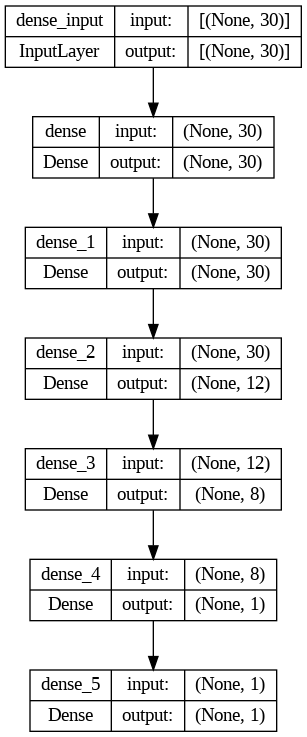

In [ ]:
from tensorflow.keras.utils import plot_model
model.add(Dense(1, activation='relu'))
plot_model(model, to_file='model_structure.png', show_shapes=True)

#### **Step #7: Fit the model**
* We will use a learning rate of 0.001.
* We will use `mean_squared_error` as the loss function and `mse` as the evaluation metric.
* Finally, we will use 10 epochs and a batch size of 64.
* We will use 10 epochs and a learning rate of 0.001.

Epoch 1/10
8/8 [==============================] - 2s 3ms/step - loss: 0.6286 - mse: 0.6286
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6286 - mse: 0.6286
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6286 - mse: 0.6286
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6286 - mse: 0.6286
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6286 - mse: 0.6286
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6286 - mse: 0.6286
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6286 - mse: 0.6286
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6286 - mse: 0.6286
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6286 - mse: 0.6286
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6286 - mse: 0.6286


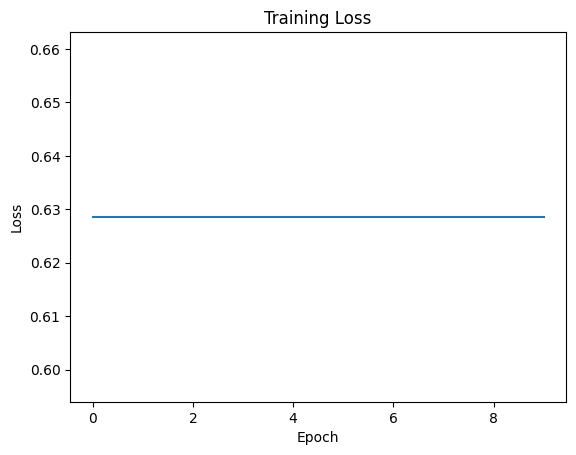

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### **Step #8: Evaluate and test the model**

After training our models, it's always important to get a sense of how well they've learned. So, let's evaluate our model!

**Run the code below to perform this step.**


In [ ]:
print('MSE: ' + str(model.evaluate(X_test, y_test)))

4/4 [==============================] - 0s 8ms/step - loss: 0.6228 - mse: 0.6228
MSE: [0.6228070259094238, 0.6228070259094238]


<a name="p1.3"></a>

---
### **Part #1.3: Different Activation Functions**
---

Now repeat the process above with a neural net of the same shape (number of layers/neurons), but with hidden layer activation function as "sigmoid" instead of "relu". Part of the challenge here is knowing what to change and what to keep and then fitting it all into the cell below.

<br>

**NOTE**: This will look like a lot of code, but almost all of it will be identical to what you have done above!

In [ ]:
# Steps 3 - 6: Building
#======================
model = Sequential()
model.add(Dense(30, input_shape=(30,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


# Step 7: Fitting
#================
history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(X_train, y_train))


# Step 8: Evaluating
#===================
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
8/8 [==============================] - 2s 95ms/step - loss: 26.2078 - accuracy: 0.6286 - val_loss: 15.0729 - val_accuracy: 0.6286
Epoch 2/10
8/8 [==============================] - 0s 25ms/step - loss: 10.8595 - accuracy: 0.6286 - val_loss: 2.7640 - val_accuracy: 0.6593
Epoch 3/10
8/8 [==============================] - 0s 20ms/step - loss: 1.5869 - accuracy: 0.5648 - val_loss: 2.6175 - val_accuracy: 0.3714
Epoch 4/10
8/8 [==============================] - 0s 24ms/step - loss: 2.1675 - accuracy: 0.3736 - val_loss: 0.5565 - val_accuracy: 0.7319
Epoch 5/10
8/8 [==============================] - 0s 22ms/step - loss: 0.7016 - accuracy: 0.8000 - val_loss: 0.8348 - val_accuracy: 0.7934
Epoch 6/10
8/8 [==============================] - 0s 23ms/step - loss: 0.5614 - accuracy: 0.8440 - val_loss: 0.4450 - val_accuracy: 0.8154
Epoch 7/10
8/8 [==============================] - 0s 14ms/step - loss: 0.4732 - accuracy: 0.7890 - val_loss: 0.3895 - val_accuracy: 0.8769
Epoch 8/10
8/8 [========

#End of notebook
---
© 2024 The Coding School, All rights reserved